In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
import sys
sys.path.append('../')
import experiments

curves = 6
curve_labels = ['4x Unreg $\\rightarrow$ Unreg', '4x Unreg $\\rightarrow$ Allreg', '4x Unreg $\\rightarrow$ Rand',
                '4x Allreg $\\rightarrow$ Unreg', '4x Allreg $\\rightarrow$ Allreg', '4x Allreg $\\rightarrow$ Rand']
curve_colors = ['blue', 'limegreen', 'red', 'lightblue', 'lightgreen', 'salmon']
layers = 4
layer_labels = [1, 2, 3, 4]

results_cluster = np.zeros((curves, 5000))
results_proj = np.zeros((curves, 5000))
# both are indexed [curve][layer][mean/std]

large_nets = [86, 91]  # the 4x unregularized and allregularized nets
opt_unreg = experiments.opt[large_nets[0]]
opt_allreg = experiments.opt[large_nets[1]]

'''
1: sq loss not unitized
2: sq loss unitized
3: loss not unitized
4: loss unitized
5: cca
6: violin plots
'''

# both of these will be indexed [cluster/proj][size][unreg/allreg/random][layer]
with open(opt_unreg.log_dir_base + opt_unreg.name + '/mappability6' + '.pkl', 'rb') as f:
    unreg_results = pickle.load(f)
with open(opt_allreg.log_dir_base + opt_allreg.name + '/mappability6' + '.pkl', 'rb') as f:
    allreg_results = pickle.load(f)

unreg_results = np.mean(unreg_results, axis=1)
allreg_results = np.mean(allreg_results, axis=1)

# rearrange data into easier format
results_cluster[:3, :] = unreg_results[0, :, :]
results_cluster[3:, :] = allreg_results[0, :, :]
results_proj[:3, :] = unreg_results[1, :, :]
results_proj[3:, :] = allreg_results[1, :, :]

print(unreg_results)


[[[ 0.02258236  0.10758017  0.0264973  ...,  0.02147477  0.02428682
    0.01671846]
  [ 0.02345339  0.108471    0.02816218 ...,  0.02265626  0.02595401
    0.01841523]
  [ 0.02456998  0.02330832  0.03174929 ...,  0.02552649  0.02886878
    0.02011165]]

 [[ 0.01122387  0.01678778  0.15565984 ...,  0.01730365  0.03028025
    0.19446628]
  [ 0.01378746  0.01993074  0.15644968 ...,  0.01995382  0.03186103
    0.19541548]
  [ 0.01483666  0.02075673  0.18929197 ...,  0.01902945  0.0358325
    0.0310827 ]]]


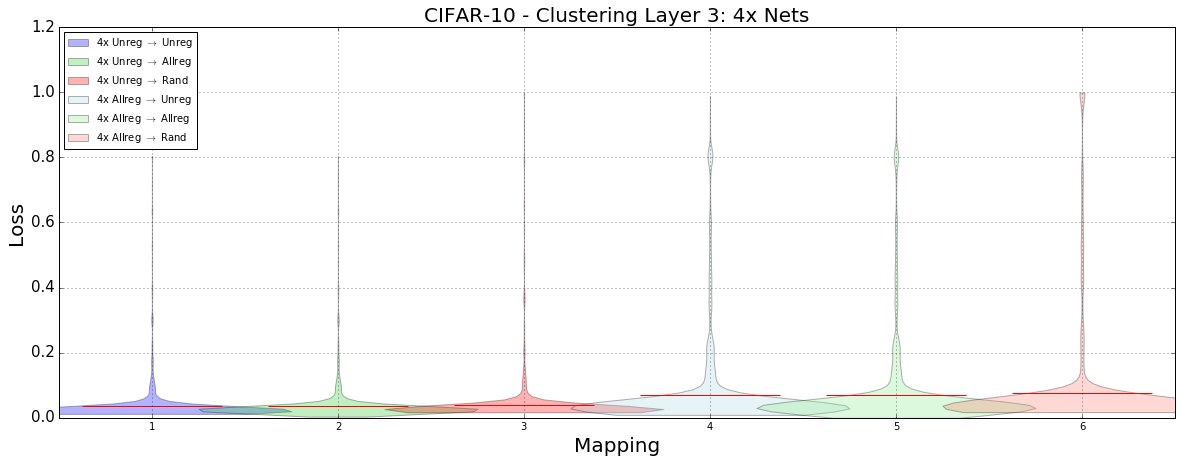

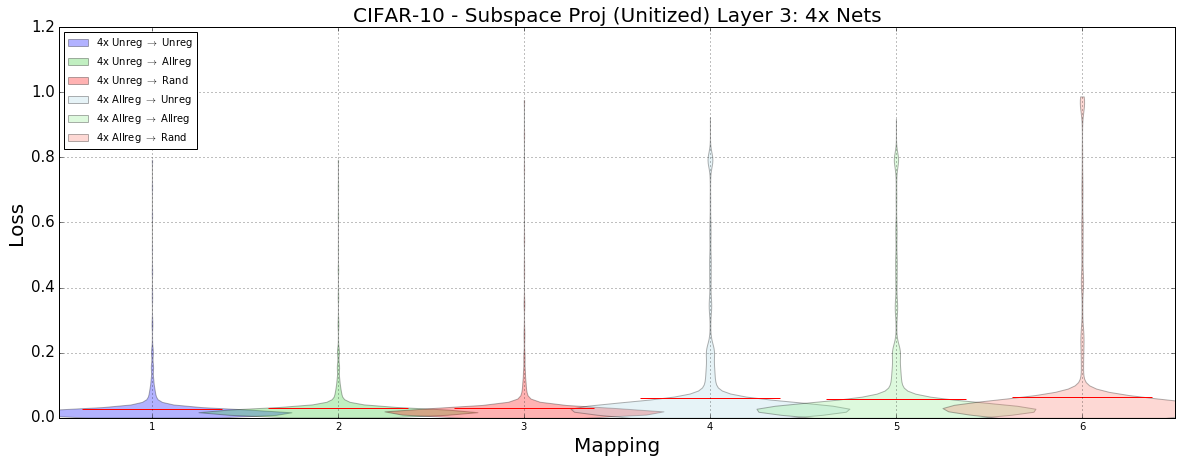

In [21]:
# first plot cluster results

% matplotlib inline

plt.figure(figsize=(20, 7))
plt.title('CIFAR-10 - Clustering Layer 3: 4x Nets', fontsize=20)
plt.xlabel('Mapping', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim((0.5, 6.5))
plt.ylim((0, 1.2))
plt.grid(True, which='both', c='black')
plt.yticks(fontsize=15)

violin_parts = plt.violinplot([results_cluster[i] for i in range(len(results_cluster))], 
                                  positions=[i for i in range(1, len(results_cluster)+1)], 
                                  widths=1.5, showmeans=True, showmedians=False, showextrema=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(curve_colors[i])
    pc.set_edgecolor('black')
plt.legend(curve_labels, loc='upper left', fontsize=10)

plt.show()

# first plot ssp results

% matplotlib inline

plt.figure(figsize=(20, 7))
plt.title('CIFAR-10 - Subspace Proj (Unitized) Layer 3: 4x Nets', fontsize=20)
plt.xlabel('Mapping', fontsize=20)
plt.ylabel('Loss', fontsize=20)
plt.xlim((0.5, 6.5))
plt.ylim((0, 1.2))
plt.grid(True, which='both', c='black')
plt.yticks(fontsize=15)

violin_parts = plt.violinplot([results_proj[i] for i in range(len(results_proj))], 
                                  positions=[i for i in range(1, len(results_proj)+1)], 
                                  widths=1.5, showmeans=True, showmedians=False, showextrema=False)
for i, pc in enumerate(violin_parts['bodies']):
    pc.set_facecolor(curve_colors[i])
    pc.set_edgecolor('black')
plt.legend(curve_labels, loc='upper left', fontsize=10)

plt.show()